In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# 📚 Reading Data

## *In this section, we will read the dataset into our notebook.*

In [2]:
def read_path(path: str)->pd.DataFrame:
    
    for _,dirname,filename in os.walk(path):
        for file in filename:
            data=os.path.join(_,file)
            data=pd.read_csv(data)
    return data

In [3]:
earthquakes_data=read_path("/kaggle/input/")
earthquakes_data.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [4]:
earthquakes_data.describe().T.style.background_gradient(cmap='viridis',subset=['count'\
                                                                               ,'max'\
                                                                               ,'mean'\
                                                                               ,'min'])

,count,mean,std,min,25%,50%,75%,max
latitude,26642.000000,16.852798,30.389200,-65.849700,-6.415275,18.884167,41.827950,86.593900
longitude,26642.000000,-11.487497,130.053399,-179.998700,-149.608650,-64.811833,126.965100,179.999400
depth,26642.000000,67.491224,116.762456,-3.370000,10.000000,21.998000,66.833000,681.238000
mag,26642.000000,4.007395,0.794423,2.600000,3.220000,4.300000,4.500000,7.800000
nst,25227.000000,42.571332,37.662352,0.000000,19.000000,30.000000,52.000000,423.000000
gap,25225.000000,124.930971,67.430145,8.000000,73.000000,111.000000,165.000000,350.000000
dmin,24776.000000,2.692908,4.043568,0.000000,0.612000,1.579000,3.172000,50.820000
rms,26642.000000,0.581575,0.256276,0.010000,0.410000,0.590000,0.750000,1.880000
horizontalError,25093.000000,7.017267,4.072365,0.000000,4.140000,7.060000,9.730000,99.000000
depthError,26642.000000,4.475056,4.451649,0.000000,1.848000,2.019000,6.669000,60.670000


In [5]:
earthquakes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

# 🧹 Data Analysis and Cleaning

## *In this section, we will explore and clean the dataset to prepare it for analysis.*

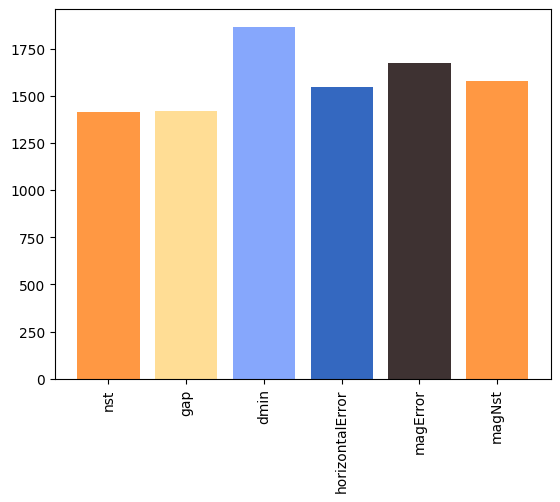

Missing Data left Count Is 1608


In [6]:
missing_data={
    "Names":list(earthquakes_data[earthquakes_data.columns[earthquakes_data.isnull().sum()>1]].select_dtypes(exclude="object").columns),
    "Values":[i for i in np.array(earthquakes_data.select_dtypes(exclude="object").isnull().sum()) if i > 0]
}
bar_colors = ['#FF9843', '#FFDD95', '#86A7FC', '#3468C0','#3E3232']

plt.bar(missing_data["Names"],missing_data["Values"],color=bar_colors)
plt.xticks(rotation=90)
plt.show()

#
earthquakes_data[missing_data["Names"]] = earthquakes_data[missing_data["Names"]].apply(lambda x: x.fillna(x.median()) if x.dtype!="object" else "Nothing to drop")
print("Missing Data left Count Is {}".format(earthquakes_data.isnull().sum().sum()))

In [7]:
categorical_data=earthquakes_data.select_dtypes(exclude="float64")
earthquakes_data.drop(columns=["id","status"],inplace=True)

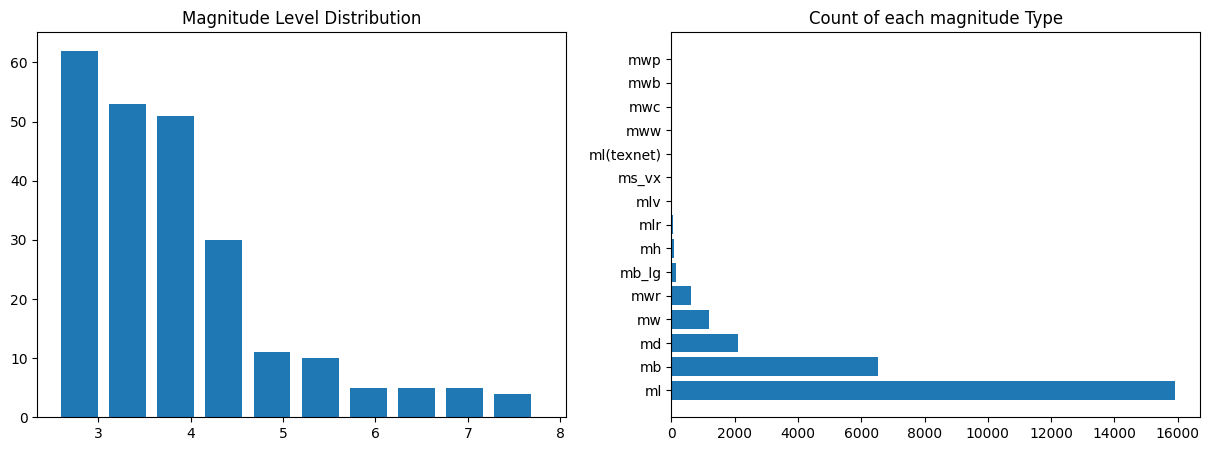

In [8]:
magnitude_types=earthquakes_data["magType"].unique()
magnitude=earthquakes_data["mag"].unique()

fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].hist(magnitude,width=.4)
axs[0].set_title("Magnitude Level Distribution")

axs[1].barh(magnitude_types,earthquakes_data["magType"].value_counts())
axs[1].set_title("Count of each magnitude Type")
plt.show()

In [9]:
earthquakes_data['locationSource'].unique()

array(['us', 'pr', 'nc', 'tx', 'ci', 'hv', 'ak', 'uu', 'nn', 'se', 'ok',
       'nm', 'uw', 'av', 'mb', 'dnk'], dtype=object)

In [10]:
high_mag=earthquakes_data[earthquakes_data['mag']>=4.5].select_dtypes(exclude="object")
max_recorded=high_mag[high_mag['mag']==high_mag['mag'].max()][["latitude","longitude"]].astype('float32')

fig=px.density_mapbox(high_mag,lat="latitude",lon="longitude",\
                      z='mag',\
                      color_continuous_scale='rainbow',\
                      radius=4,\
                      zoom=2,\
                      opacity=.6,\
                      height=600,\
                      center=(dict(lat=max_recorded['latitude'].iloc[0],
                                   lon=max_recorded['longitude'].iloc[0]))
                     )

fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [11]:
earthquakes_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,horizontalError,depthError,magError,magNst,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,2023-12-29T03:37:19.334Z,-6.9527,154.9829,10.000,5.20,mb,72.0,60.0,3.9240,0.93,us,2023-12-29T04:05:57.040Z,"89 km SW of Panguna, Papua New Guinea",earthquake,10.07,1.765,0.048,141.0,us,us
26638,2023-12-29T04:38:54.109Z,32.3262,141.7386,10.000,5.10,mb,74.0,121.0,1.8030,0.70,us,2023-12-29T10:59:44.533Z,"Izu Islands, Japan region",earthquake,9.17,1.870,0.042,187.0,us,us
26639,2023-12-29T08:42:05.747Z,-7.2411,68.0663,10.000,5.10,mb,60.0,54.0,12.7760,0.57,us,2023-12-29T08:57:05.040Z,Chagos Archipelago region,earthquake,8.02,1.792,0.090,40.0,us,us
26640,2023-12-29T11:02:48.679Z,-19.1602,169.0428,153.264,4.70,mb,40.0,61.0,3.7460,0.82,us,2023-12-29T11:22:46.040Z,"49 km NNW of Isangel, Vanuatu",earthquake,8.52,7.433,0.081,46.0,us,us


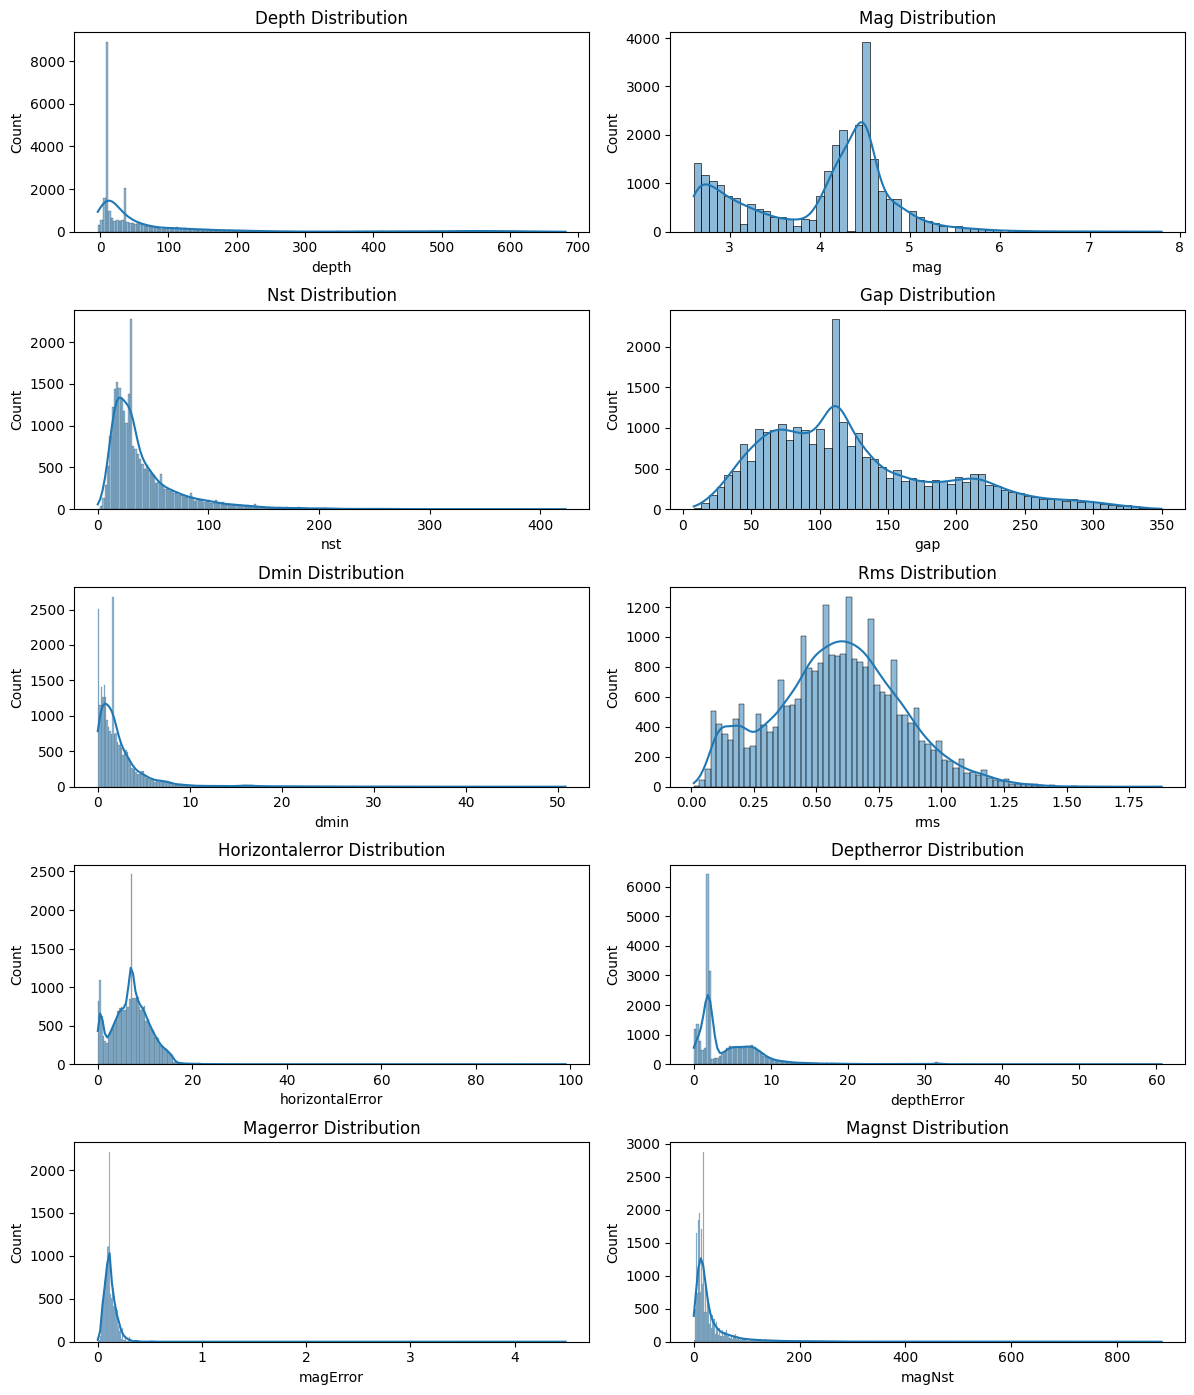

In [12]:
dist_num_data=earthquakes_data.select_dtypes(exclude="object").drop(['latitude','longitude'],axis=1)
fig,axs=plt.subplots(len(dist_num_data.columns)//2,2,figsize=(12,14))
axs=axs.flatten()

for ax,data in zip(axs,dist_num_data):
    sns.histplot(ax=ax,data=dist_num_data[data],kde=True)
    ax.set_title("{} Distribution".format(str(dist_num_data[data].name).capitalize()))
    
fig.tight_layout(pad=.9)

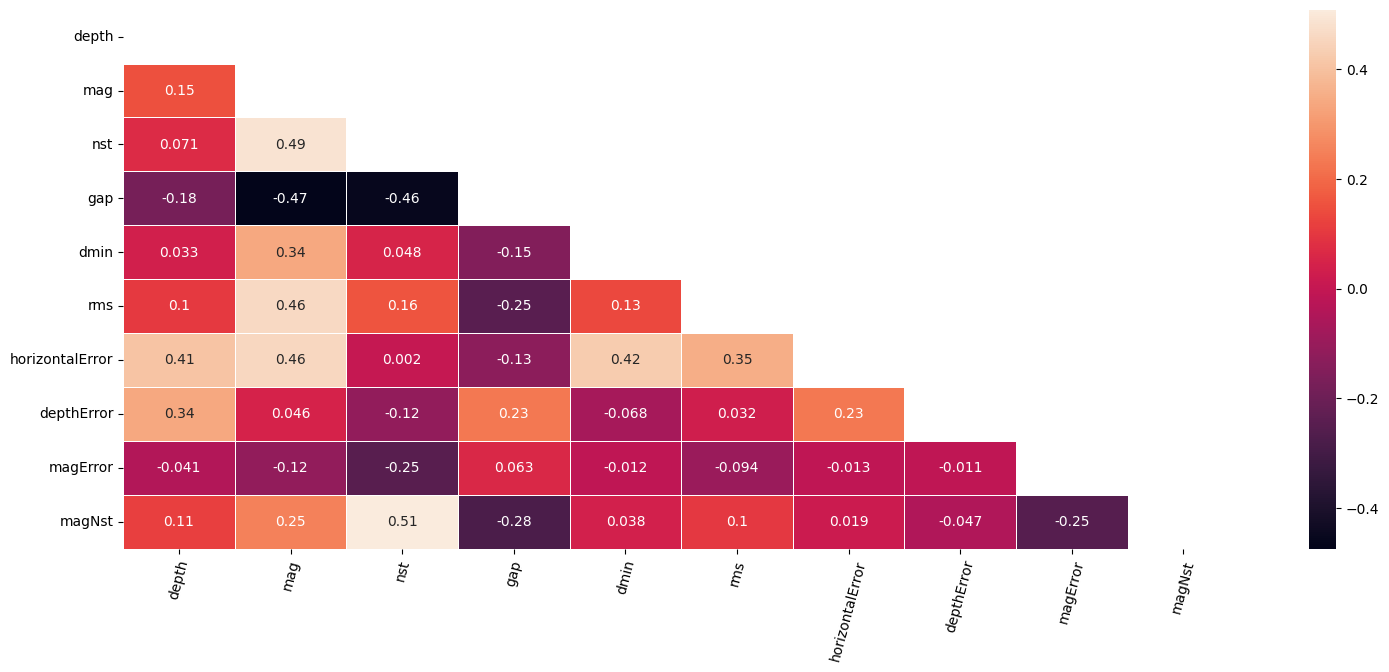

In [13]:
corr=earthquakes_data.iloc[:,3:].select_dtypes(exclude="object").corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
fig,ax=plt.subplots(1,1,figsize=(18,7))
sns.heatmap(ax=ax,data=corr,mask=mask,annot=True,linewidths=.7)
plt.xticks(rotation=75)
plt.show()

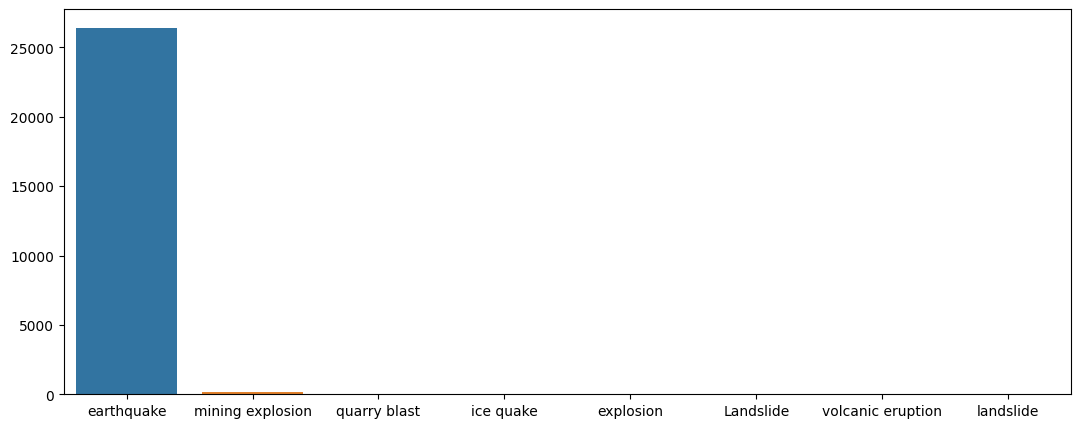

In [14]:
eq_types=earthquakes_data["type"].unique()
types=dict()
for _,i in enumerate(eq_types):
    types[i]=earthquakes_data[earthquakes_data["type"]==i]["mag"].value_counts().sum()

types=pd.DataFrame(types,index=range(len(eq_types)))
fig,ax=plt.subplots(1,1,figsize=(13,5))
sns.barplot(ax=ax,data=types)
plt.show()